## Diveplane Coding Challenge
### Elapsed Time: 1 hour, 45 minutes

In [52]:
import random 
import numpy as np
import matplotlib as plt
# function for testing, to generate a dictionary of 1k random numbers to be used as input
def generateRandomDistro(size):
    i = 0
    inputDict = {}
    # dirichlet distro. creates 0-1 sum to 1 distro.
    probs = np.random.dirichlet(np.ones(size),size=1).tolist()[0]
    while (i < size):
        # associate number with probability
        inputDict[i] = probs[i]
        i += 1
    return inputDict

# create a prefixSum of all probabilities, will sum to 1
def prefixSum(inputDict):
    i = 0
    prefixSumList = []
    for i in range(0, len(inputDict)):
        if(i > 0):
            prefixSumList.append(prefixSumList[i-1] + inputDict[i])
            i += 1
         # establish first element
        else:
            prefixSumList.append(inputDict[i])
            i += 1
    return prefixSumList
def getCeilIndex(prefixSumList):
    # generate a random no. from 0 - 1
    randomProb = random.random()
    # if random is lower than first item in prefixSum, return first item index
    if randomProb <= prefixSumList[0]:
        return 0
    # else, search through 
    i = 0
    # if an exact match, return i index
    for i in range(0, len(prefixSumList)):
        if prefixSumList[i] == randomProb:
            return i
        # if between i and i+1 return the i+1 index
        if prefixSumList[i] < randomProb and prefixSumList[i+1] >= randomProb:
            return i+1
def getRandom(index, inputDict):
    return list(inputDict.keys())[index]
def plotDistribution(inputDict, prefixSumList):
    xAxis = []
    for _ in range(10000):
        indexFromInput = getCeilIndex(prefixSumList)
        xAxis.append(getRandom(indexFromInput, inputDict))
    plt.pyplot.hist(xAxis, bins = range(0, len(inputDict), 5), color='green', label='Probability Distribution')


In [53]:
# for proof of distributions
def testDriver():
    inputDict = generateRandomDistro(100)
    prefixSumList = prefixSum(inputDict)
    plotDistribution(inputDict, prefixSumList)

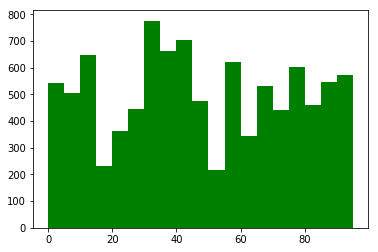

In [54]:
testDriver()